# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [3]:
# WRITE YOUR CODE HERE
#install.packages("glmnet")

require(tidyverse)
require(ggplot2)
require(glmnet)




Loading required package: glmnet

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-7



We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [4]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [5]:
# WRITE YOUR CODE HERE
df <- data.frame(x,y)

set.seed(121)
train <- sample(nrow(df) * 0.5)
df_train <- df[train,]
df_test <- df[-train,]



(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

`geom_smooth()` using formula = 'y ~ x'


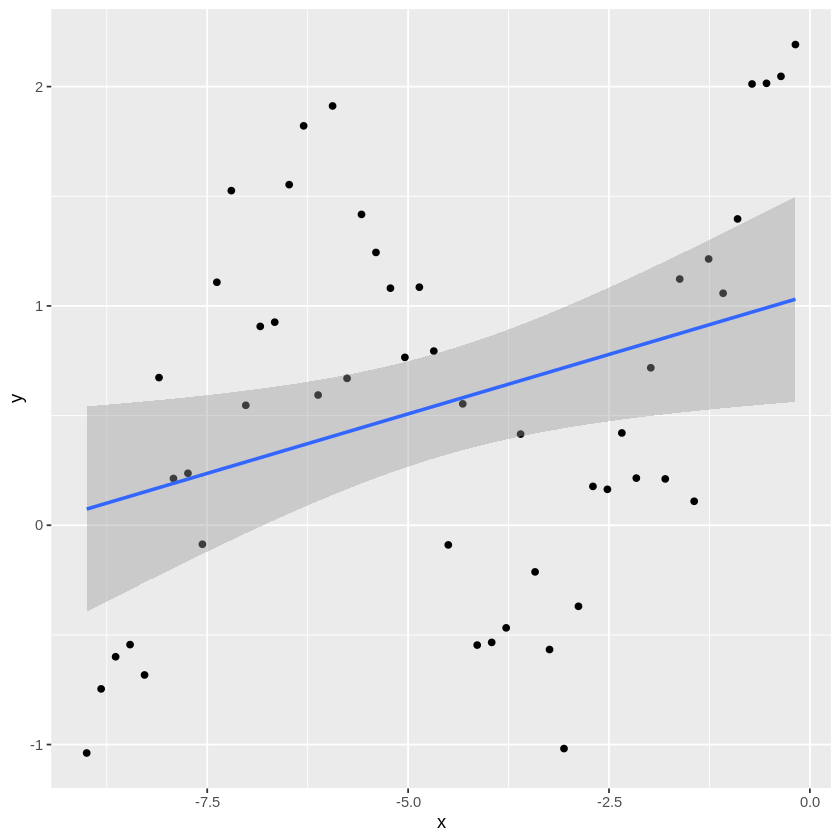

In [6]:
# WRITE YOUR CODE HERE
p <- ggplot(df_train,aes(x,y))+
  geom_point()+
  geom_smooth(method = "lm")
p



How would you describe the relationship between $x$ and $y$ based on this plot?

> *Write your response here*

Looking at the data points alone, there's maybe a slight positive relationship. This is reflected in geom smooth. However there is a lot of noise.

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results. 


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*

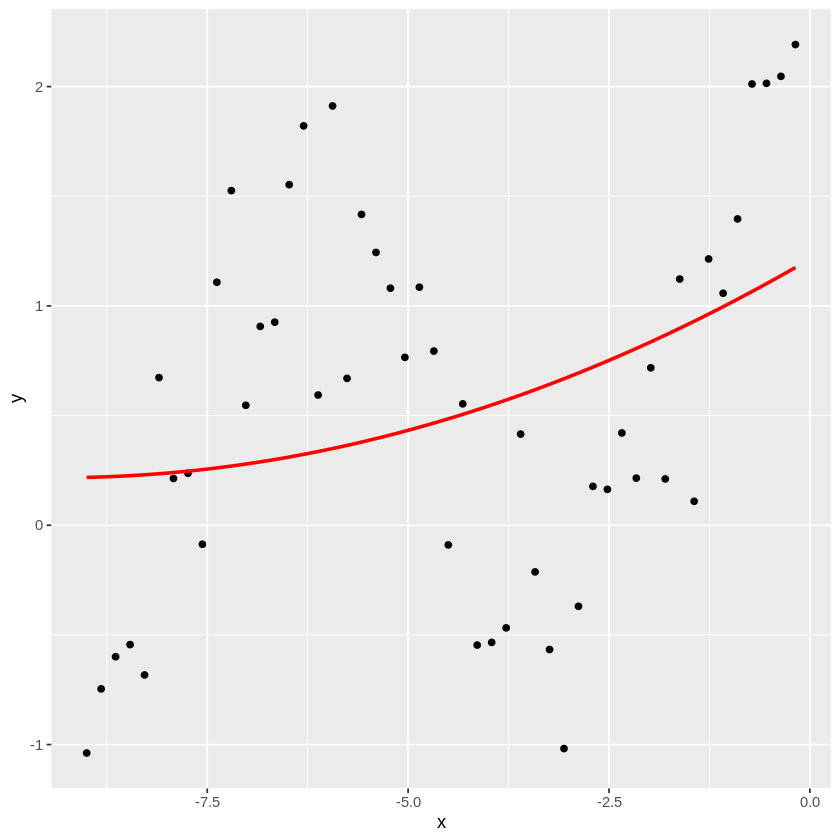

In [7]:
# WRITE YOUR CODE HERE
p <- ggplot(df_train,aes(x,y))+
  geom_point()+
  stat_smooth(method="lm", se=TRUE, fill=NA,
            formula=y ~ poly(x, 2, raw=TRUE),colour="red")
p



How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better? 

> *Write your response here*


This line does better than the standard linear model before, but doesn't fully capture data trends.

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?

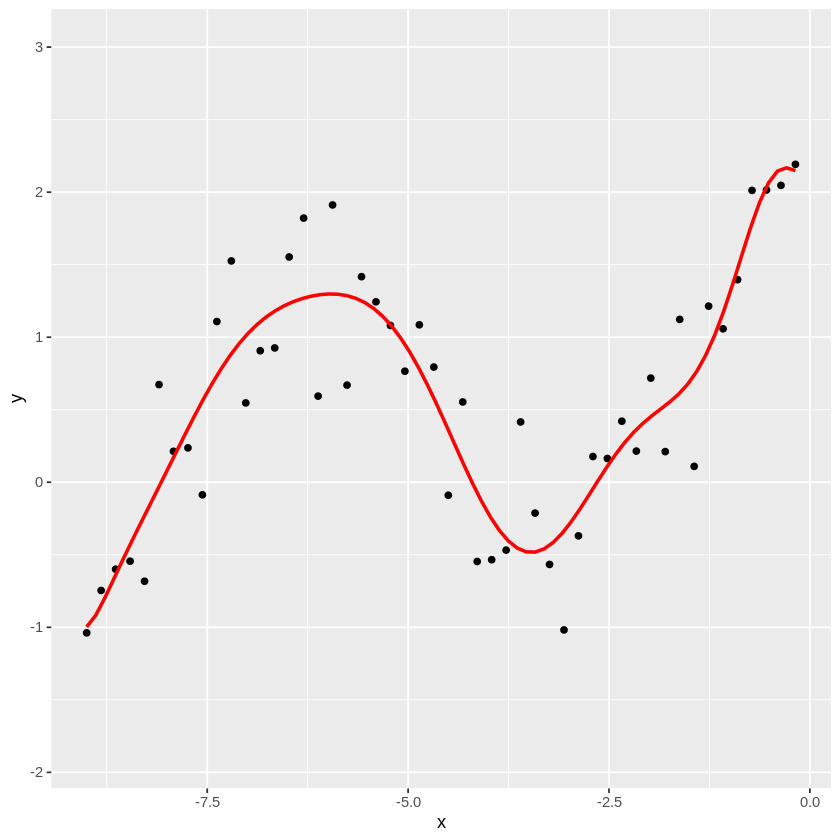

In [8]:
# WRITE YOUR CODE HERE
p <- ggplot(df_train,aes(x,y))+
  geom_point()+
  stat_smooth(method="lm", se=TRUE, fill=NA,
            formula=y ~ poly(x, 12, raw=TRUE),colour="red")
p


> *Write your response here* 

This regression line is definitely better than the prior two regression lines.

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy. 

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length 

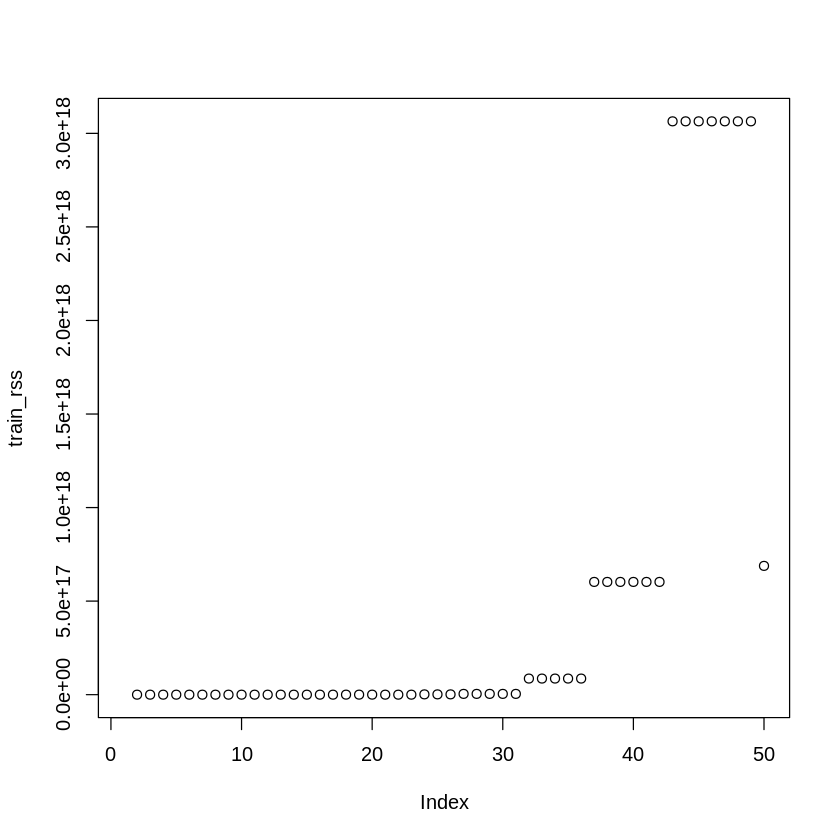

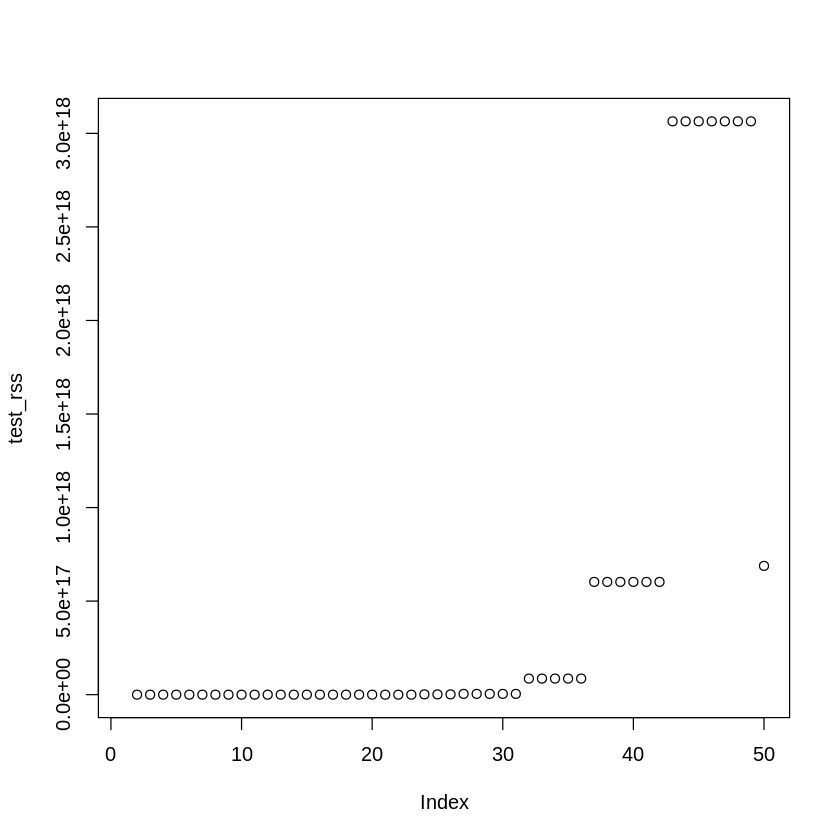

In [9]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)

for (k in degree) {
  # WRITE YOUR CODE HERE
 
  model <- lm(y ~ poly(x, k, raw = TRUE), data = df_train)
  
  predictions.test <- model %>% predict(df_test)
  predictions.train <- model %>% predict(df_train)

  train_rss[k] = median((predictions.test-df_train$y)^2) 
  
  test_rss[k] = median((predictions.test-df_test$y)^2) 
  
}

# Plot your results here
# WRITE YOUR CODE HERE
plot(train_rss)

plot(test_rss)

What do you see as $k$ increase?

> *Write your response here* 


As k increases error increases, we don't start to see huge problems until k ~40.

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length is not a multiple of shorter object length”
Warning message in predictions.test - df_train$y:
“longer object length 

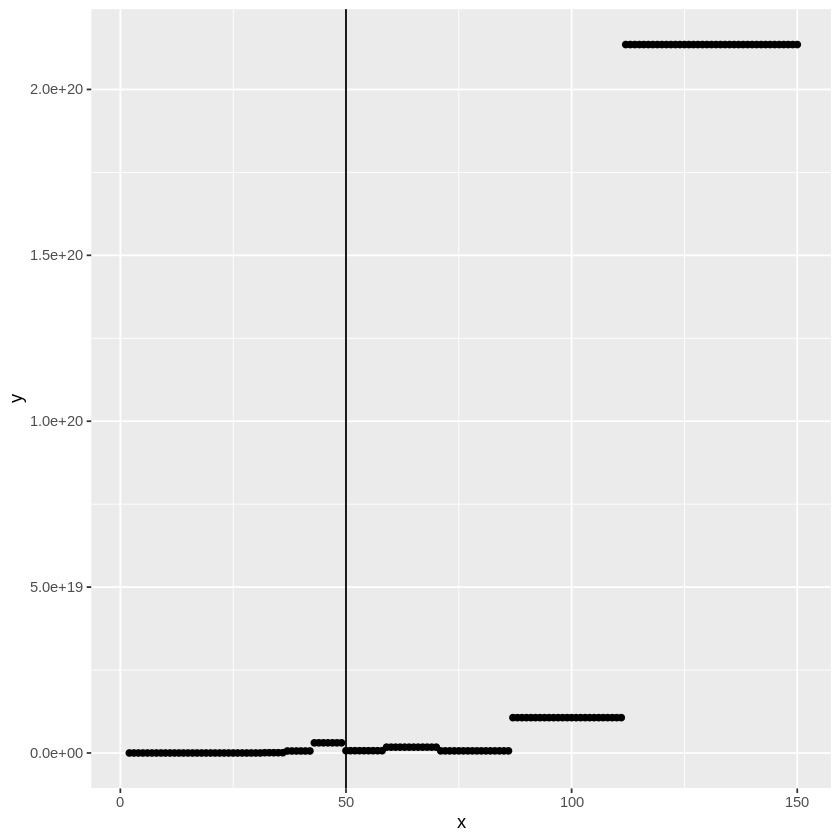

In [11]:
degree = seq(2,150)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)


for (k in degree) {
  # WRITE YOUR CODE HERE
 
  model <- lm(y ~ poly(x, k, raw = TRUE), data = df_train)
  
  predictions.test <- model %>% predict(df_test)
  predictions.train <- model %>% predict(df_train)

  train_rss[k] = median((predictions.test-df_train$y)^2) 
  
  test_rss[k] = median((predictions.test-df_test$y)^2) 
  
}
  
  
d_train <- data.frame(y=train_rss,x = 1:150)

p <- ggplot(d_train,aes(x,y))+
  geom_point()+
  geom_vline(xintercept = 50)
p
  


What do you see as $k$ gets larger than $n$?

> *Write your response here* 


When K is greater than n, we see a larger increase at 100, and extremely large at ~120.

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time. 

In [16]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005
degree = seq(2,150)

rm(train_rss, test_rss)
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)


x2 = model.matrix(y~., df_train)

y2 = df_train$y[!(is.na(df_train$y))] 

for (k in degree) {
    # WRITE YOUR CODE HERE

   model <- glmnet(x2, y2, alpha = 0, lambda = lambda)
  
   predictions.test <- model %>% predict(df_test)
   predictions.train <- model %>% predict(df_train)

   train_rss[k] = median((predictions.test-df_train$y)^2) 
  
   test_rss[k] = median((predictions.test-df_test$y)^2) 

}

# Plot your results here
# WRITE YOUR CODE HERE


  
d_train <- data.frame(y=train_rss,x = 1:150)

p <- ggplot(d_train,aes(x,y))+
  geom_point()+
  geom_vline(xintercept = 50)
p
  



ERROR: ignored

What happens now when $k$ gets larger than $n$?

> *Write your response here* 


This is as far as I got and couldn't figure out how to integrate k with the ridge regression.

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> *Write your response here* 
> 

--- 
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> *Write your response here* 
> 

**DUE:** 5pm EST, April 12, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*